In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
from fastai.vision import *

In [7]:
path=pathlib.Path('/media/tris/tris_files/era-for-bw')
path

PosixPath('/media/tris/tris_files/era-for-bw')

In [8]:
df = pd.read_csv(path/'labels_proc_arousal.csv')
df.tail()

,file_name,arousal
1275,s32_t36,0.773333
1276,s32_t37,0.681111
1277,s32_t38,0.778889
1278,s32_t39,0.796667
1279,s32_t40,0.447778


In [27]:
# np.random.seed(60)
# src = (ImageList.from_csv(path, 'labels_proc.csv', folder='GAF-cmap', suffix='.png')
#        .split_by_rand_pct(0.2)
#        .label_from_df(cols=['valence','arousal','dominance','liking'],label_cls=FloatList)
#        .transform()
#        .databunch(bs=10).normalize(imagenet_stats))

In [9]:
#np.random.seed(60)
src = (ImageList.from_csv(path, 'labels_proc_arousal.csv', folder='GAF-cmap-BW', suffix='.png')
       .split_by_rand_pct(0.2)
       .label_from_df(cols=['arousal'],label_cls=FloatList)
       .transform()
       .databunch(bs=4).normalize())



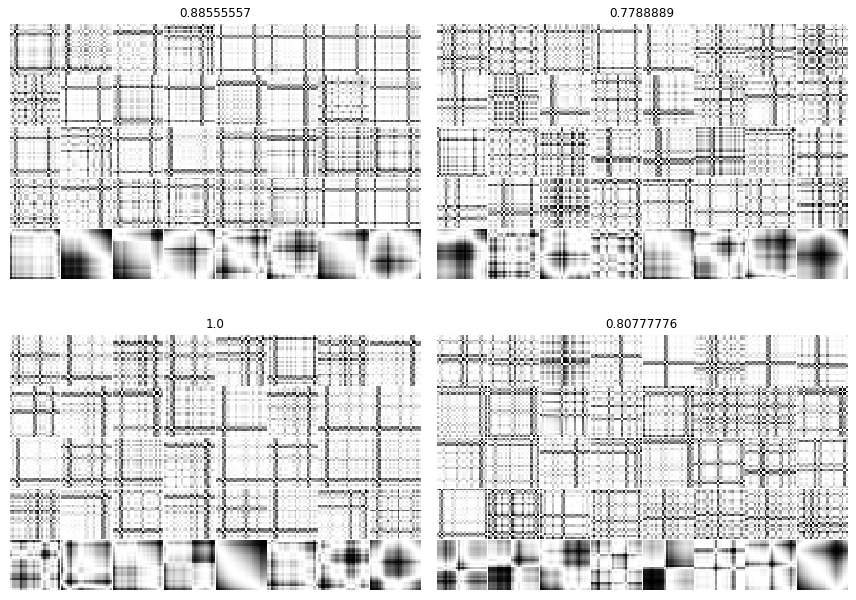

In [10]:
src.show_batch(rows=2, figsize=(12,9))

In [11]:
learn = cnn_learner(src, models.resnet34, metrics=[root_mean_squared_error], loss_func=MSELossFlat())
#learn = unet_learner(src, models.resnet18, metrics=[root_mean_squared_error])

In [23]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 353, 565]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 353, 565]       128        True      
______________________________________________________________________
ReLU                 [64, 353, 565]       0          False     
______________________________________________________________________
MaxPool2d            [64, 177, 283]       0          False     
______________________________________________________________________
Conv2d               [64, 177, 283]       36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 177, 283]       128        True      
______________________________________________________________________
ReLU                 [64, 177, 283]       0          False     
___________________________________________________

epoch,train_loss,valid_loss,root_mean_squared_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


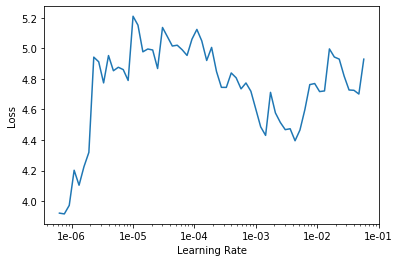

In [12]:
learn.lr_find()
learn.recorder.plot()

In [13]:
lr = 1e-4

In [14]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,4.054927,1.395531,1.105365,01:07
1,3.871872,1.131907,1.015640,01:07
2,3.337884,0.949921,0.908949,01:07
3,3.473361,0.921159,0.896498,01:09
4,2.589347,0.838925,0.862808,01:08


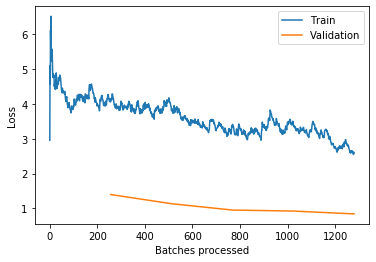

In [15]:
learn.recorder.plot_losses()

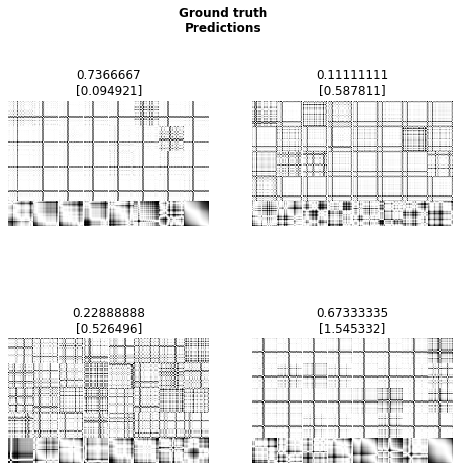

In [16]:
learn.show_results()

epoch,train_loss,valid_loss,root_mean_squared_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


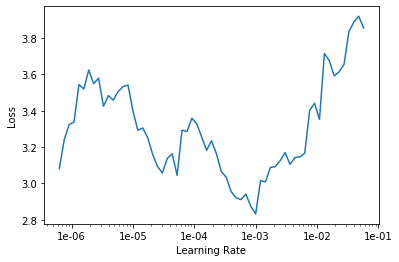

In [17]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [18]:
lr = 3e-3

In [19]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,2.333220,0.949685,0.893037,01:30
1,0.510811,0.179596,0.392271,01:31
2,0.212874,0.075320,0.257556,01:31
3,0.115178,0.068126,0.249295,01:31
4,0.085795,0.055090,0.223347,01:31


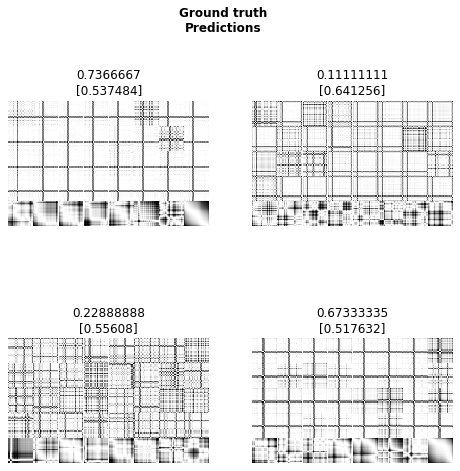

In [20]:
learn.show_results()

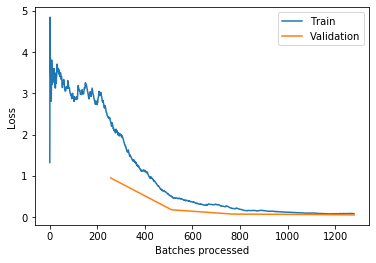

In [21]:
learn.recorder.plot_losses()

😬😬😬😬😬😬😬😬